In [1]:
from tensorflow.keras.models import Sequential
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_curve, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# CSV 파일 불러오기
single_data = pd.read_csv("../merged_dataset/single_train/single_train.csv")
single_test_data = pd.read_csv("../extracted_keypoints/jumprope_test/sj_type1_9.csv")

double_data = pd.read_csv("../merged_dataset/double_train/double_train.csv")
double_test_data = pd.read_csv("../extracted_keypoints/quickly_test/sj_type2_7.csv")

In [3]:
# 'Frame'열을 제외한 모든 열 선택
feature_columns = single_data.columns[1:-1]

# 입력 데이터(X)와 레이블(Y) 분리
X_single = single_data[feature_columns].values
Y_single = single_data['Label'].values

X_single_test = single_test_data[feature_columns].values
Y_single_test = single_test_data['Label'].values



# standardscaler로 데이터 정규화
single_scaler = StandardScaler()
single_scaler_test = StandardScaler()


X_single = single_scaler.fit_transform(X_single)
X_single_test = single_scaler_test.fit_transform(X_single_test)


X_single=X_single.astype(int)
Y_single=Y_single.astype(int)

X_single_test=X_single_test.astype(int)
Y_single_test=Y_single_test.astype(int)

In [4]:
# 'Frame'열을 제외한 모든 열 선택
feature_columns = double_data.columns[1:-1]

# 입력 데이터(X)와 레이블(Y) 분리
X_double = double_data[feature_columns].values
Y_double = double_data['Label'].values

X_double_test = double_test_data[feature_columns].values
Y_double_test = double_test_data['Label'].values



# standardscaler로 데이터 정규화
double_scaler = StandardScaler()
double_scaler_test = StandardScaler()


X_double = double_scaler.fit_transform(X_double)
X_double_test = double_scaler_test.fit_transform(X_double_test)


X_double=X_double.astype(int)
Y_double=Y_double.astype(int)

X_double_test=X_double_test.astype(int)
Y_double_test=Y_double_test.astype(int)

In [5]:
# train-valid 데이터 분할 (80%, 20%)
X_single_train, X_single_val, Y_single_train, Y_single_val = train_test_split(X_single, Y_single, test_size=0.2, random_state=42)

In [6]:
# train-valid 데이터 분할 (80%, 20%)
X_double_train, X_double_val, Y_double_train, Y_double_val = train_test_split(X_double, Y_double, test_size=0.2, random_state=42)

In [7]:
single_model = Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(27,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

double_model = Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(27,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
single_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['Accuracy'])

double_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['Accuracy'])

In [9]:
eps = 100

In [10]:
# 데이터 형태 조정 (3D로 변환)
X_single_train_3d = X_single_train.reshape((X_single_train.shape[0], X_single_train.shape[1], 1))
X_single_val_3d = X_single_val.reshape((X_single_val.shape[0], X_single_val.shape[1], 1))

# 데이터 형태 조정 (3D로 변환)
X_double_train_3d = X_double_train.reshape((X_double_train.shape[0], X_double_train.shape[1], 1))
X_double_val_3d = X_double_val.reshape((X_double_val.shape[0], X_double_val.shape[1], 1))

In [11]:
single_history = single_model.fit(X_single_train_3d, Y_single_train, epochs=eps, batch_size=32, validation_data=(X_single_val_3d, Y_single_val))

Epoch 1/100
26/26 [==============================] - 1s 10ms/step - loss: 0.6177 - Accuracy: 0.7075 - val_loss: 0.4975 - val_Accuracy: 0.9317
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 0.3978 - Accuracy: 0.9033 - val_loss: 0.2778 - val_Accuracy: 0.9610
Epoch 3/100
26/26 [==============================] - 0s 4ms/step - loss: 0.2590 - Accuracy: 0.9253 - val_loss: 0.1866 - val_Accuracy: 0.9610
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 0.1997 - Accuracy: 0.9278 - val_loss: 0.1491 - val_Accuracy: 0.9707
Epoch 5/100
26/26 [==============================] - 0s 5ms/step - loss: 0.1640 - Accuracy: 0.9425 - val_loss: 0.1265 - val_Accuracy: 0.9756
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 0.1401 - Accuracy: 0.9486 - val_loss: 0.1179 - val_Accuracy: 0.9707
Epoch 7/100
26/26 [==============================] - 0s 4ms/step - loss: 0.1252 - Accuracy: 0.9535 - val_loss: 0.1138 - val_Accuracy: 0.9756
Epoch 8/100


In [12]:
double_history = double_model.fit(X_double_train_3d, Y_double_train, epochs=eps, batch_size=32, validation_data=(X_double_val_3d, Y_double_val))

Epoch 1/100
28/28 [==============================] - 1s 9ms/step - loss: 0.5711 - Accuracy: 0.6667 - val_loss: 0.4738 - val_Accuracy: 0.7104
Epoch 2/100
28/28 [==============================] - 0s 5ms/step - loss: 0.4176 - Accuracy: 0.7710 - val_loss: 0.3778 - val_Accuracy: 0.8009
Epoch 3/100
28/28 [==============================] - 0s 5ms/step - loss: 0.3593 - Accuracy: 0.8095 - val_loss: 0.3351 - val_Accuracy: 0.8281
Epoch 4/100
28/28 [==============================] - 0s 5ms/step - loss: 0.3266 - Accuracy: 0.8311 - val_loss: 0.3134 - val_Accuracy: 0.8371
Epoch 5/100
28/28 [==============================] - 0s 5ms/step - loss: 0.3045 - Accuracy: 0.8537 - val_loss: 0.3068 - val_Accuracy: 0.8552
Epoch 6/100
28/28 [==============================] - 0s 5ms/step - loss: 0.2813 - Accuracy: 0.8798 - val_loss: 0.2901 - val_Accuracy: 0.8597
Epoch 7/100
28/28 [==============================] - 0s 5ms/step - loss: 0.2664 - Accuracy: 0.8889 - val_loss: 0.2846 - val_Accuracy: 0.8552
Epoch 8/100
2

In [13]:
# 모델들 학습 및 평가
single_model.fit(X_single_train, Y_single_train)
single_Y_prob = single_model.predict(X_single_test) 
single_auc_score = roc_auc_score(Y_single_test, single_Y_prob)


# 임계값 설정
threshold = 0.5  # 예측된 확률이 0.5 이상이면 클래스를 1로 예측

# 예측된 확률을 클래스 레이블로 변환
single_Y_pred_binary = (single_Y_prob >= threshold).astype(int)

# Precision 계산
single_precision = precision_score(Y_single_test, single_Y_pred_binary)

# Recall 계산
single_recall = recall_score(Y_single_test, single_Y_pred_binary)

# F1 score 계산
single_f1 = f1_score(Y_single_test, single_Y_pred_binary)

# Confusion Matrix 계산
single_conf_matrix = confusion_matrix(Y_single_test, single_Y_pred_binary)

single_accuracy = accuracy_score(Y_single_test, single_Y_pred_binary)




6/6 [==============================] - 0s 1ms/step


In [14]:
# 모델들 학습 및 평가
double_model.fit(X_double_train, Y_double_train)
double_Y_prob = double_model.predict(X_double_test)
double_auc_score = roc_auc_score(Y_double_test, double_Y_prob)

# 임계값 설정
threshold = 0.5  # 예측된 확률이 0.5 이상이면 클래스를 1로 예측

# 예측된 확률을 클래스 레이블로 변환
double_Y_pred_binary = (double_Y_prob >= threshold).astype(int)

# Precision 계산
double_precision = precision_score(Y_double_test, double_Y_pred_binary)

# Recall 계산
double_recall = recall_score(Y_double_test, double_Y_pred_binary)

# F1 score 계산
double_f1 = f1_score(Y_double_test, double_Y_pred_binary)

# Confusion Matrix 계산
double_conf_matrix = confusion_matrix(Y_double_test, double_Y_pred_binary)

double_accuracy = accuracy_score(Y_double_test, double_Y_pred_binary)




5/5 [==============================] - 0s 1ms/step


In [15]:
# 결과 출력
print("Single")
print("Precision:", single_precision)
print("Recall:", single_recall)
print(f"AUC score: {single_auc_score}")
print("F1 score:", single_f1)
print("Accuracy:", single_accuracy)


Single
Precision: 0.7777777777777778
Recall: 1.0
AUC score: 0.9685714285714285
F1 score: 0.875
Accuracy: 0.8857142857142857


In [16]:
# 결과 출력
print("Double")
print("Precision:", double_precision)
print("Recall:", double_recall)
print(f"AUC score: {double_auc_score}")
print("F1 score:", double_f1)
print("Accuracy:", double_accuracy)


Double
Precision: 0.8088235294117647
Recall: 0.7746478873239436
AUC score: 0.9255970606246173
F1 score: 0.7913669064748201
Accuracy: 0.7928571428571428


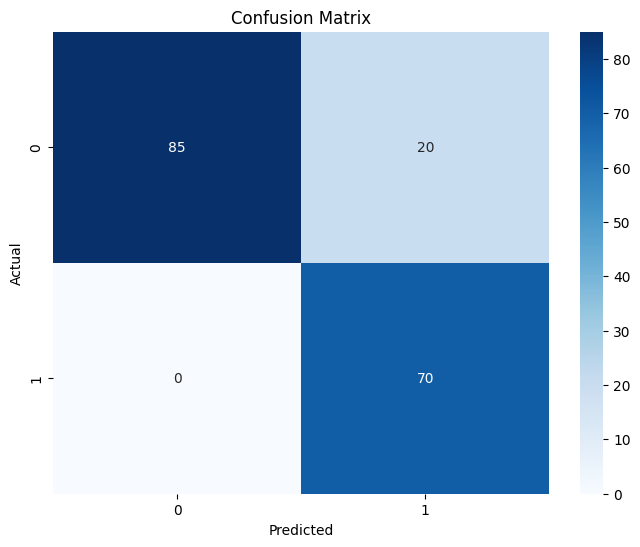

In [17]:
# Single confusion matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(single_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

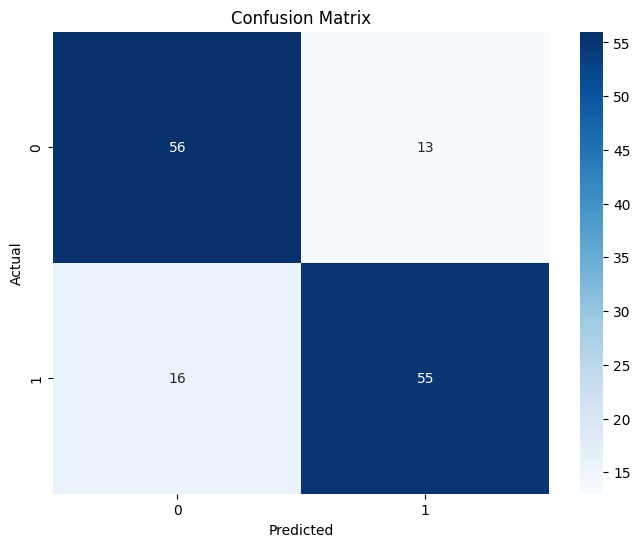

In [18]:
# Double confusion matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(double_conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

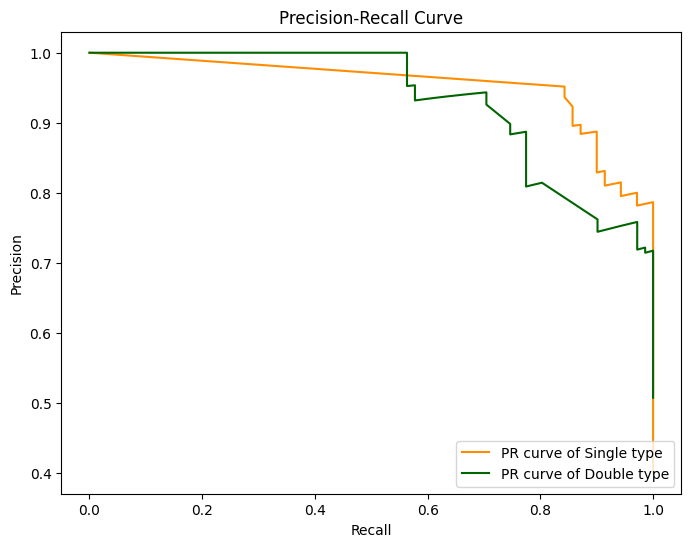

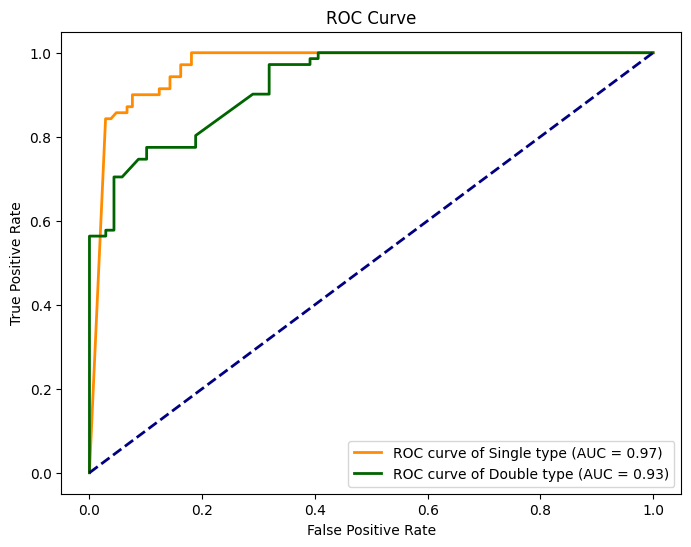

In [28]:
# Precision-Recall curve 그리기
s_precision, s_recall, _ = precision_recall_curve(Y_single_test, single_Y_prob)
d_precision, d_recall, _ = precision_recall_curve(Y_double_test, double_Y_prob)
plt.figure(figsize=(8, 6))
plt.plot(s_recall, s_precision, color='darkorange', label='PR curve of Single type')
plt.plot(d_recall, d_precision, color='darkgreen', label='PR curve of Double type')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.show()

# ROC AUC curve 그리기
s_fpr, s_tpr, _ = roc_curve(Y_single_test, single_Y_prob)
d_fpr, d_tpr, _ = roc_curve(Y_double_test, double_Y_prob)
single_roc_auc = auc(s_fpr, s_tpr)
double_roc_auc = auc(d_fpr, d_tpr)
plt.figure(figsize=(8, 6))
plt.plot(s_fpr, s_tpr, color='darkorange', lw=2, label='ROC curve of Single type (AUC = %0.2f)' % single_roc_auc)
plt.plot(d_fpr, d_tpr, color='darkgreen', lw=2, label='ROC curve of Double type (AUC = %0.2f)' % double_roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [20]:
# 테스트 데이터에 대한 예측 결과를 얻기 위해 모델 사용
single_predictions = single_model.predict(X_single_test)

# 이동 평균을 계산하여 예측값 부드럽게 만들기
single_smoothed_predictions = np.convolve(single_predictions.squeeze(), np.ones(6)/6, mode='same')

# 테스트 데이터에 대한 예측 결과를 바이너리 형태로 변환
single_binary_predictions = (single_smoothed_predictions > 0.5).astype(int)

6/6 [==============================] - 0s 2ms/step


In [21]:
# 테스트 데이터에 대한 예측 결과를 얻기 위해 모델 사용
double_predictions = double_model.predict(X_double_test)

# 이동 평균을 계산하여 예측값 부드럽게 만들기
double_smoothed_predictions = np.convolve(double_predictions.squeeze(), np.ones(6)/6, mode='same')

# 테스트 데이터에 대한 예측 결과를 바이너리 형태로 변환
double_binary_predictions = (double_smoothed_predictions > 0.5).astype(int)

5/5 [==============================] - 0s 1ms/step


In [22]:
# 0에서 1로 바뀌는 구간에서 줄넘기 개수 카운트
single_jump_count = np.sum(np.diff(single_binary_predictions.flatten()) > 0)

In [23]:
# 0에서 1로 바뀌는 구간에서 줄넘기 개수 카운트
double_jump_count = np.sum(np.diff(double_binary_predictions.flatten()) > 0)

In [24]:
# 테스트 데이터의 점프수
print(f'Predicted Jump Count for single: {single_jump_count}')


Predicted Jump Count for single: 10


In [25]:
# 테스트 데이터의 점프수
print(f'Predicted Jump Count for double: {double_jump_count}')


Predicted Jump Count for double: 8


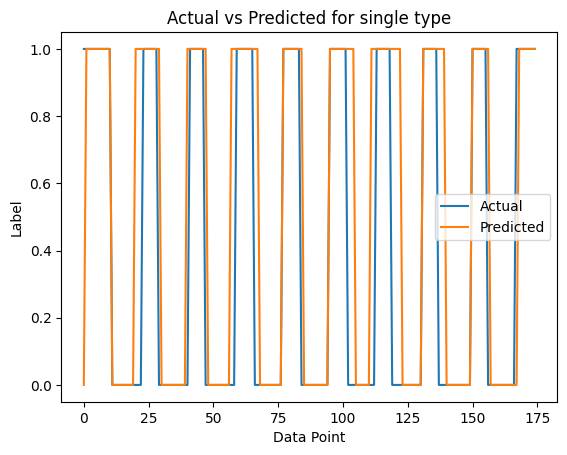

In [26]:
# Single type에 대한 예측 결과

plt.plot(Y_single_test, label='Actual')
plt.plot(single_binary_predictions.flatten(), label='Predicted')
plt.title('Actual vs Predicted for single type')
plt.xlabel('Data Point')
plt.ylabel('Label')
plt.legend()
plt.show()

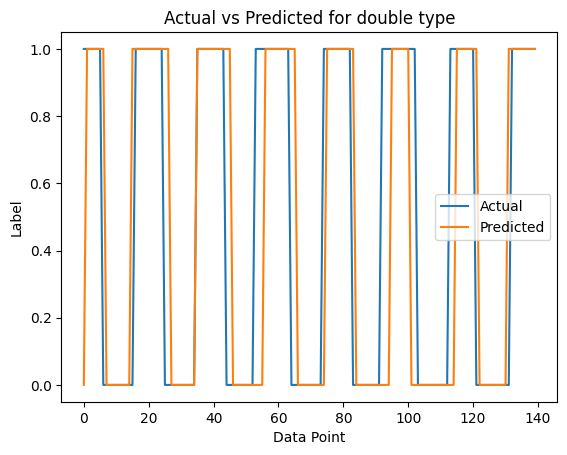

In [27]:
# Single type에 대한 예측 결과

plt.plot(Y_double_test, label='Actual')
plt.plot(double_binary_predictions.flatten(), label='Predicted')
plt.title('Actual vs Predicted for double type')
plt.xlabel('Data Point')
plt.ylabel('Label')
plt.legend()
plt.show()